In [1]:
import re
import nltk
from collections import defaultdict
import math
import pandas as pd
import matplotlib.pyplot as plt
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.probability import FreqDist
nltk.download('wordnet')
nltk.download('punkt')
data = pd.read_csv("/content/tweets-dataset.csv")
sent=data['Sentence'].values.tolist()
new_data=''
for i in sent:
    new_data=new_data+i+' '

new_data=re.sub(r'http/(?:url|URL)|#[/A-Za-z0-9_]+|@[A-Za-z0-9_]+|https?://(?:[A-Za-z0-9]|[./])+','',new_data)
new_data=re.sub(r'twitter.com(?:[A-Za-z0-9]|[./])+','',new_data)
new_data=re.sub(r'[^A-Za-z ]+',' ',new_data)
# with open("data.txt","w") as f:
#  	f.write(new_data)
# f.close()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
######Q1#######Q1############Q1

tokens=len(word_tokenize(new_data))
types=len(set(word_tokenize(new_data)))
print("Tokens: {}".format(tokens),"Types: {}".format(types),"TTR: {}".format(types/tokens),sep="\n")

###############################

Tokens: 290747
Types: 36909
TTR: 0.12694541990115119


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


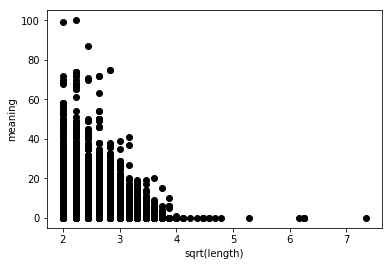

In [7]:
######Q2##########Q2###########Q2
word=random.choices(list(set(word_tokenize(new_data))),k=20000)


synonyms = defaultdict(int)
#for extraction of meaning i used WORDNET
for i in word:
	lword=[]
	for syn in wordnet.synsets(i):
		for l in syn.lemmas():
			lword.append(l.name())
	if len(set(lword))!=0:
		synonyms[i]=len(set(lword))


length=[math.sqrt(len(i)) for i in word if len(i)>=4]
meaning=[synonyms[i] for i in word if len(i)>=4]
# print(synonyms,meaning,length,end="\n")
plt.xlabel('sqrt(length)')
plt.ylabel('meaning')
plt.scatter(length,meaning, c=(0,0,0))
plt.show() 

###########################################################################




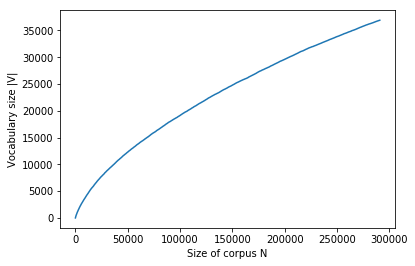

In [8]:
#########Q3############Q3#############Q3###########

i = 0
heap_dict=defaultdict(int)
token=word_tokenize(new_data)
words = set()
for word in token:
    words.add(word)
    i += 1
    heap_dict[i]=len(words)
N=[int(i) for i in heap_dict.keys()]
V=[int(heap_dict[i]) for i in heap_dict.keys()]
plt.xlabel('Size of corpus N')
plt.ylabel('Vocabulary size |V|')
plt.plot(N,V)
plt.show()

###################################################